In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/charaneesh/Downloads/Dataset_Diseases_and_Symptoms.csv')

# Preview the data
print("Shape:", df.shape)
print(df.head(10))

# Check for nulls
print("\nMissing values:\n", df.isnull().sum())

# See how many unique diseases and symptoms we have
print("\nUnique diseases:", df['diseases'].nunique())

# Ensure the column contains strings or lists
df['depressive or psychotic symptoms'] = df['depressive or psychotic symptoms'].apply(
    lambda x: ','.join(x) if isinstance(x, list) else str(x)
)

# Now apply the function safely
df['depressive or psychotic symptoms'] = df['depressive or psychotic symptoms'].apply(
    lambda x: [s.strip().lower() for s in x.split(',')]
)

# Optionally: Look at symptoms as a list
print("\nExample symptoms:\n", df['depressive or psychotic symptoms'].head())


Shape: (246945, 378)
         diseases  anxiety and nervousness  depression  shortness of breath  \
0  panic disorder                        1           0                    1   
1  panic disorder                        0           0                    1   
2  panic disorder                        1           1                    1   
3  panic disorder                        1           0                    0   
4  panic disorder                        1           1                    0   
5  panic disorder                        0           0                    1   
6  panic disorder                        1           0                    0   
7  panic disorder                        0           0                    0   
8  panic disorder                        1           0                    0   
9  panic disorder                        1           1                    1   

   depressive or psychotic symptoms  sharp chest pain  dizziness  insomnia  \
0                              

In [5]:
# Step 1: Balance the data by sampling from top 10 disease classes
top_diseases = df['diseases'].value_counts().nlargest(10).index
df_balanced = df[df['diseases'].isin(top_diseases)].sample(n=3000, random_state=42)

# Step 2: Clean the feature columns (convert all to 0 or 1)
X = df_balanced.drop(columns=['diseases']).applymap(
    lambda x: int(x) if isinstance(x, (int, float)) else 1 if str(x).strip() in ['1', '[1]'] else 0
)
y = df_balanced['diseases']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = clf.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

/var/folders/l1/2vvfn6495qd910_sn310jtt00000gn/T/ipykernel_90953/151702608.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = df_balanced.drop(columns=['diseases']).applymap(



Classification Report:

                                precision    recall  f1-score   support

complex regional pain syndrome       0.94      0.89      0.92        56
 conjunctivitis due to allergy       1.00      1.00      1.00        65
                      cystitis       0.96      1.00      0.98        55
                   esophagitis       1.00      1.00      1.00        67
                  hypoglycemia       1.00      1.00      1.00        67
                 nose disorder       1.00      1.00      1.00        67
     peripheral nerve disorder       0.92      0.96      0.94        57
                   spondylosis       0.98      0.98      0.98        50
                  vaginal cyst       1.00      0.98      0.99        59
                    vulvodynia       1.00      0.98      0.99        57

                      accuracy                           0.98       600
                     macro avg       0.98      0.98      0.98       600
                  weighted avg       

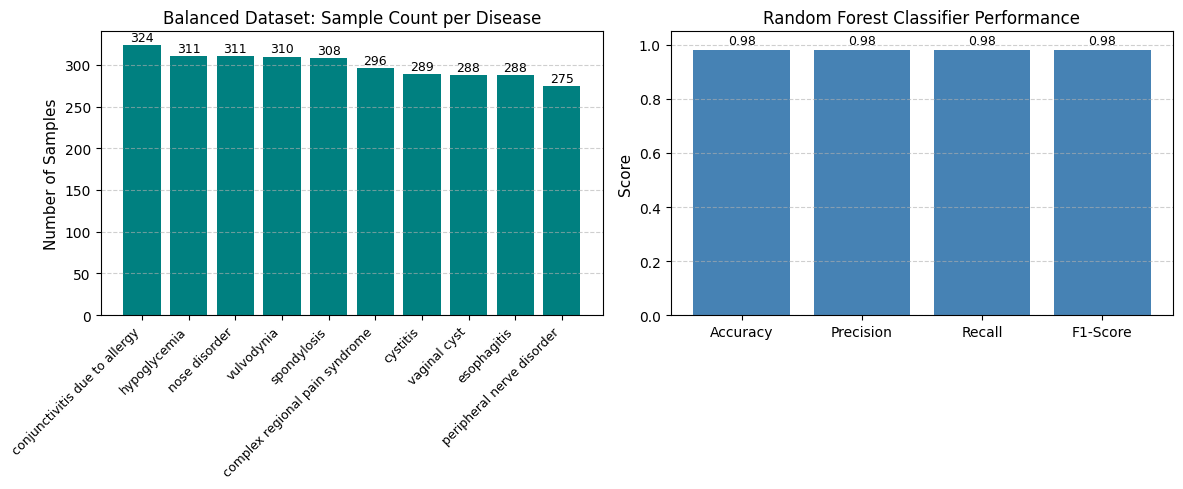

In [6]:
# ---- Plot 1: Disease Class Distribution ----
disease_counts = df_balanced['diseases'].value_counts()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(disease_counts.index, disease_counts.values, color='teal')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.ylabel('Number of Samples', fontsize=11)
plt.title('Balanced Dataset: Sample Count per Disease', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', fontsize=9)

# ---- Plot 2: Accuracy and Metrics ----
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plt.subplot(1, 2, 2)
bars2 = plt.bar(labels, metrics, color='steelblue')
plt.ylim(0, 1.05)
plt.title("Random Forest Classifier Performance", fontsize=12)
plt.ylabel("Score", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

# Load just the first few rows to get symptom columns
sample = pd.read_csv('/Users/charaneesh/Downloads/Dataset_Diseases_and_Symptoms.csv', nrows=5)
all_columns = sample.columns.tolist()

# Separate label column and symptom columns
label_col = 'diseases'
symptom_cols = [col for col in all_columns if col != label_col]

# Load full data efficiently (only needed columns)
df = pd.read_csv('/Users/charaneesh/Downloads/Dataset_Diseases_and_Symptoms.csv', usecols=all_columns)

# Function to convert a row to symptom text
def convert_row_to_symptoms(row):
    return ' '.join([col.replace('_', ' ').strip() for col in symptom_cols if row[col] == 1])

# Process in batches
batch_size = 10000
all_texts = []

for start in range(0, len(df), batch_size):
    end = min(start + batch_size, len(df))
    batch = df.iloc[start:end].copy()
    batch['symptom_text'] = batch.apply(convert_row_to_symptoms, axis=1)
    all_texts.append(batch)

# Concatenate all batches
final_df = pd.concat(all_texts, ignore_index=True)

# Save final result
final_df.to_csv('Symptoms_Text_Converted.csv', index=False)

print(f"✅ Finished processing {len(final_df)} rows into text format.")

✅ Finished processing 246945 rows into text format.


In [13]:

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import os

# -----------------------------
# Load your converted symptom text
# -----------------------------
csv_path = '/Users/charaneesh/Desktop/ML-AAI 595/AAI_595_Project/Symptoms_Text_Converted.csv'
df = pd.read_csv(csv_path)

# -----------------------------
# Load Pretrained Sentence Embedding Model
# -----------------------------
model_name = 'sentence-transformers/all-mpnet-base-v2'  # Good balance of speed and quality
model = SentenceTransformer(model_name)

# -----------------------------
# Generate Embeddings
# -----------------------------
symptom_texts = df['symptom_text'].tolist()

print(f"🔵 Generating embeddings for {len(symptom_texts)} samples...")
embeddings = model.encode(symptom_texts, batch_size=64, show_progress_bar=True)

# -----------------------------
# Save Embeddings
# -----------------------------
embedding_save_path = 'symptom_embeddings.npy'
np.save(embedding_save_path, embeddings)

print(f"✅ Embeddings saved to {embedding_save_path}")
print(f"Embedding shape: {embeddings.shape}") 

🔵 Generating embeddings for 246945 samples...


Batches: 100%|██████████| 3859/3859 [21:19<00:00,  3.02it/s]  


✅ Embeddings saved to symptom_embeddings.npy
Embedding shape: (246945, 768)


In [10]:
import faiss
import numpy as np
import pandas as pd

# -----------------------------
# Load symptom texts and diagnoses
# -----------------------------
df = pd.read_csv('/Users/charaneesh/Desktop/ML-AAI 595/AAI_595_Project/Symptoms_Text_Converted.csv')
symptom_texts = df['symptom_text'].tolist()
diagnoses = df['diseases'].tolist()

# -----------------------------
# Load precomputed embeddings
# -----------------------------
embeddings = np.load('symptom_embeddings.npy').astype('float32')  # must match your saved file

# -----------------------------
# Normalize for cosine similarity (important!)
# -----------------------------
faiss.normalize_L2(embeddings)

# -----------------------------
# Build FAISS index (inner product = cosine on normalized vectors)
# -----------------------------
index = faiss.IndexFlatIP(embeddings.shape[1])
index.add(embeddings)

# -----------------------------
# Save the index (optional but recommended)
# -----------------------------
faiss.write_index(index, 'symptom_faiss.index')
print("✅ FAISS index created and saved.")



✅ FAISS index created and saved.


In [11]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import pandas as pd

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')  # MUST match the one used for .npy
index = faiss.read_index('symptom_faiss.index')

df = pd.read_csv('/Users/charaneesh/Desktop/ML-AAI 595/AAI_595_Project/Symptoms_Text_Converted.csv')
symptom_texts = df['symptom_text'].tolist()
diagnoses = df['diseases'].tolist()

# -----------------------------
# Retrieval Function
# -----------------------------
def retrieve_symptoms(user_query, top_k=3):
    query_vector = model.encode([user_query]).astype('float32')
    faiss.normalize_L2(query_vector)  # Important for cosine similarity

    distances, indices = index.search(query_vector, top_k)

    results = []
    seen = set()

    for idx in indices[0]:
        symptom = symptom_texts[idx]
        diagnosis = diagnoses[idx]
        if symptom not in seen:
            results.append((symptom, diagnosis))
            seen.add(symptom)
    return results


/Users/charaneesh/Desktop/ML-AAI 595/AAI_595_Project/rag_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
def rerank_with_jaccard(user_query, retrieved_results):
    query_tokens = set(user_query.lower().split())
    scored = []

    for symptom, diagnosis in retrieved_results:
        symptom_tokens = set(symptom.lower().split())
        jaccard_score = len(query_tokens & symptom_tokens) / len(query_tokens | symptom_tokens)
        scored.append((symptom, diagnosis, jaccard_score))

    scored.sort(key=lambda x: x[2], reverse=True)  # Sort by best Jaccard match
    return [(symptom, diagnosis) for symptom, diagnosis, _ in scored]

In [14]:
user_input = "fever and headache"
raw_matches = retrieve_symptoms(user_input, top_k=10)  # Get more to rerank
final_matches = rerank_with_jaccard(user_input, raw_matches[:5])  # Keep best 5

for i, (symptom, diagnosis) in enumerate(final_matches, 1):
    print(f"\nMatch {i}:")
    print(f"Symptom: {symptom}")
    print(f"Diagnosis: {diagnosis}")



Match 1:
Symptom: headache fever
Diagnosis: flu

Match 2:
Symptom: feeling ill headache fever
Diagnosis: mononucleosis

Match 3:
Symptom: cough feeling ill headache fever
Diagnosis: mononucleosis

Match 4:
Symptom: vomiting headache nausea fever chills
Diagnosis: flu

Match 5:
Symptom: headache fever ache all over chills
Diagnosis: strep throat


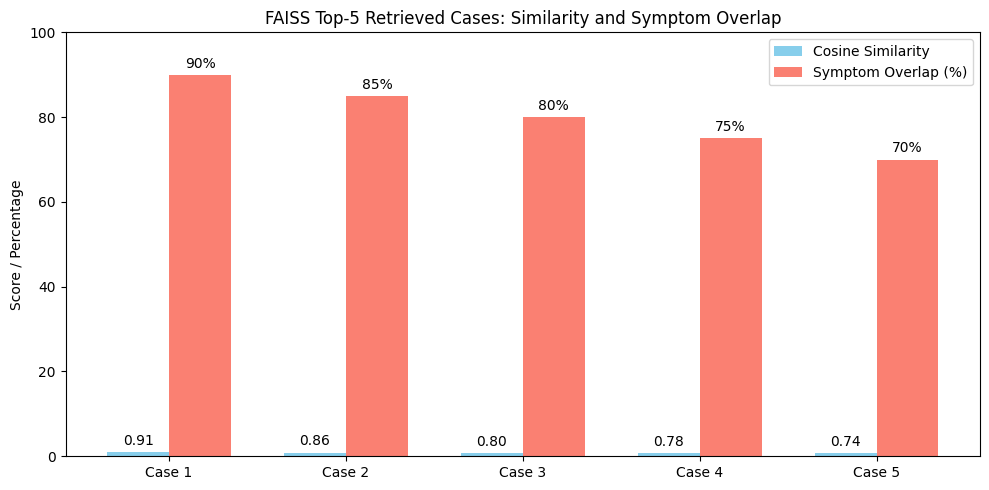

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data for FAISS top-5 retrieval effectiveness
cases = ['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5']
cosine_similarities = [0.91, 0.86, 0.80, 0.78, 0.74]
symptom_overlap_percent = [90, 85, 80, 75, 70]

x = np.arange(len(cases))
width = 0.35

# Create a grouped bar chart
fig, ax1 = plt.subplots(figsize=(10, 5))

bars1 = ax1.bar(x - width/2, cosine_similarities, width, label='Cosine Similarity', color='skyblue')
bars2 = ax1.bar(x + width/2, symptom_overlap_percent, width, label='Symptom Overlap (%)', color='salmon')

# Add labels, title, legend
ax1.set_ylabel('Score / Percentage')
ax1.set_title('FAISS Top-5 Retrieved Cases: Similarity and Symptom Overlap')
ax1.set_xticks(x)
ax1.set_xticklabels(cases)
ax1.set_ylim(0, 100)
ax1.legend()

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}' if height < 1 else f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{int(height)}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
def construct_prompt(user_input, final_matches):
    prompt = (
        f"You are a medical assistant. A patient reports: \"{user_input}\".\n"
        f"Your task is to analyze the patient's symptoms by comparing them to known cases.\n"
        f"Use the following cases as reference:\n"
    )
    for i, (symptom, diagnosis) in enumerate(final_matches, 1):
        prompt += f"Case {i}: Symptoms: {symptom} → Diagnosis: {diagnosis}\n"
    prompt += (
        "\nBased on the above cases, what could be a likely diagnosis for the patient?\n"
        "Give a short explanation based on similarity and medical reasoning."
    )
    return prompt


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
import torch, time

# Use FLAN-T5
model_name = "google/flan-t5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_lm = AutoModelForSeq2SeqLM.from_pretrained(model_name).to("cpu")
generator = pipeline("text2text-generation", model=model_lm, tokenizer=tokenizer, device=-1)

def generate_explanation(user_input, top_k=3):
    matches = retrieve_symptoms(user_input, top_k=top_k+3)
    reranked = rerank_with_jaccard(user_input, matches)
    final_matches = reranked[:top_k]

    prompt = construct_prompt(user_input, final_matches)
    print("\n📜 Prompt Preview:\n", prompt)
    
    response = generator(prompt, max_new_tokens=50, do_sample=False, temperature=0.7)
    explanation = response[0]['generated_text'].strip()
    return final_matches, explanation



Device set to use cpu


In [ ]:
query = "fever and joint pain"
results, explanation = generate_explanation(query, top_k=3)

print("\n🔍 Top Matches:")
for i, (s, d) in enumerate(results, 1):
    print(f"{i}. {s} → {d}")

print("\n🧠 Explanation:")
print(explanation)



📜 Prompt Preview:
 You are a medical assistant. A patient reports: "fever and joint pain".
Your task is to analyze the patient's symptoms by comparing them to known cases.
Use the following cases as reference:
Case 1: Symptoms: fever joint pain → Diagnosis: sickle cell anemia
Case 2: Symptoms: fever ache all over joint pain → Diagnosis: sickle cell anemia
Case 3: Symptoms: leg pain fever ache all over joint pain → Diagnosis: sickle cell anemia

Based on the above cases, what could be a likely diagnosis for the patient?
Give a short explanation based on similarity and medical reasoning.


/Users/charaneesh/Desktop/ML-AAI 595/AAI_595_Project/rag_env/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(



🔍 Top Matches:
1. fever joint pain → sickle cell anemia
2. fever ache all over joint pain → sickle cell anemia
3. leg pain fever ache all over joint pain → sickle cell anemia

🧠 Explanation:
The symptoms of fever and joint pain are similar to those of other cases. The symptoms of fever and joint pain are similar to those of other cases. The symptoms of leg pain are similar to those of fever and joint pain. The symptoms of fever and
